<a href="https://colab.research.google.com/github/Singhsansar/Song-Popularity-Predictiom/blob/main/SongpopularityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Song Poluparity Prediction

In [26]:
#importing the Necessary dependencies 
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd # for reading and printing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt # for the graph plotting (shows the relationship between the datas)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # split the data set in to the train and the test data
import seaborn as sns  #plot the graph of the data set
from sklearn import metrics  # transforming the data in to the metrics

## Dataset Pre-Processing and Visualization

In [6]:
#reaading the CSV file using pandas as pd
song_data = pd.read_csv("/content/top50.csv",encoding = "ISO-8859-1")

song_data.head(5)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Seï¿½orita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [7]:
song_data.shape


(50, 14)

In [8]:
song_data.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [9]:
song_data['Genre'].value_counts()

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
reggaeton           2
reggaeton flow      2
panamanian pop      2
canadian pop        2
electropop          2
country rap         2
dfw rap             2
brostep             2
trap music          1
escape room         1
pop house           1
australian pop      1
atl hip hop         1
big room            1
boy band            1
r&b en espanol      1
Name: Genre, dtype: int64

In [10]:
#list of all Genere
song_data['Genre'].unique()

array(['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap',
       'trap music', 'country rap', 'electropop', 'reggaeton',
       'panamanian pop', 'canadian hip hop', 'latin', 'escape room',
       'pop house', 'australian pop', 'edm', 'atl hip hop', 'big room',
       'boy band', 'r&b en espanol', 'brostep'], dtype=object)

In [11]:
#checking for the duplicated data 
song_data.duplicated().sum()

0

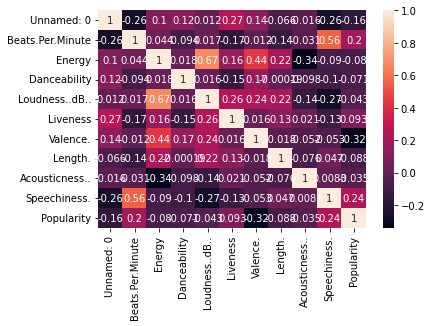

In [12]:
#heatmap is generally used to show the correalation between diffrent attributes of the dataset
 #annot,If True, write the data value in each cell.
 #corr is used to show the corelations between the columns 
sns.heatmap(song_data.corr(),annot=True)

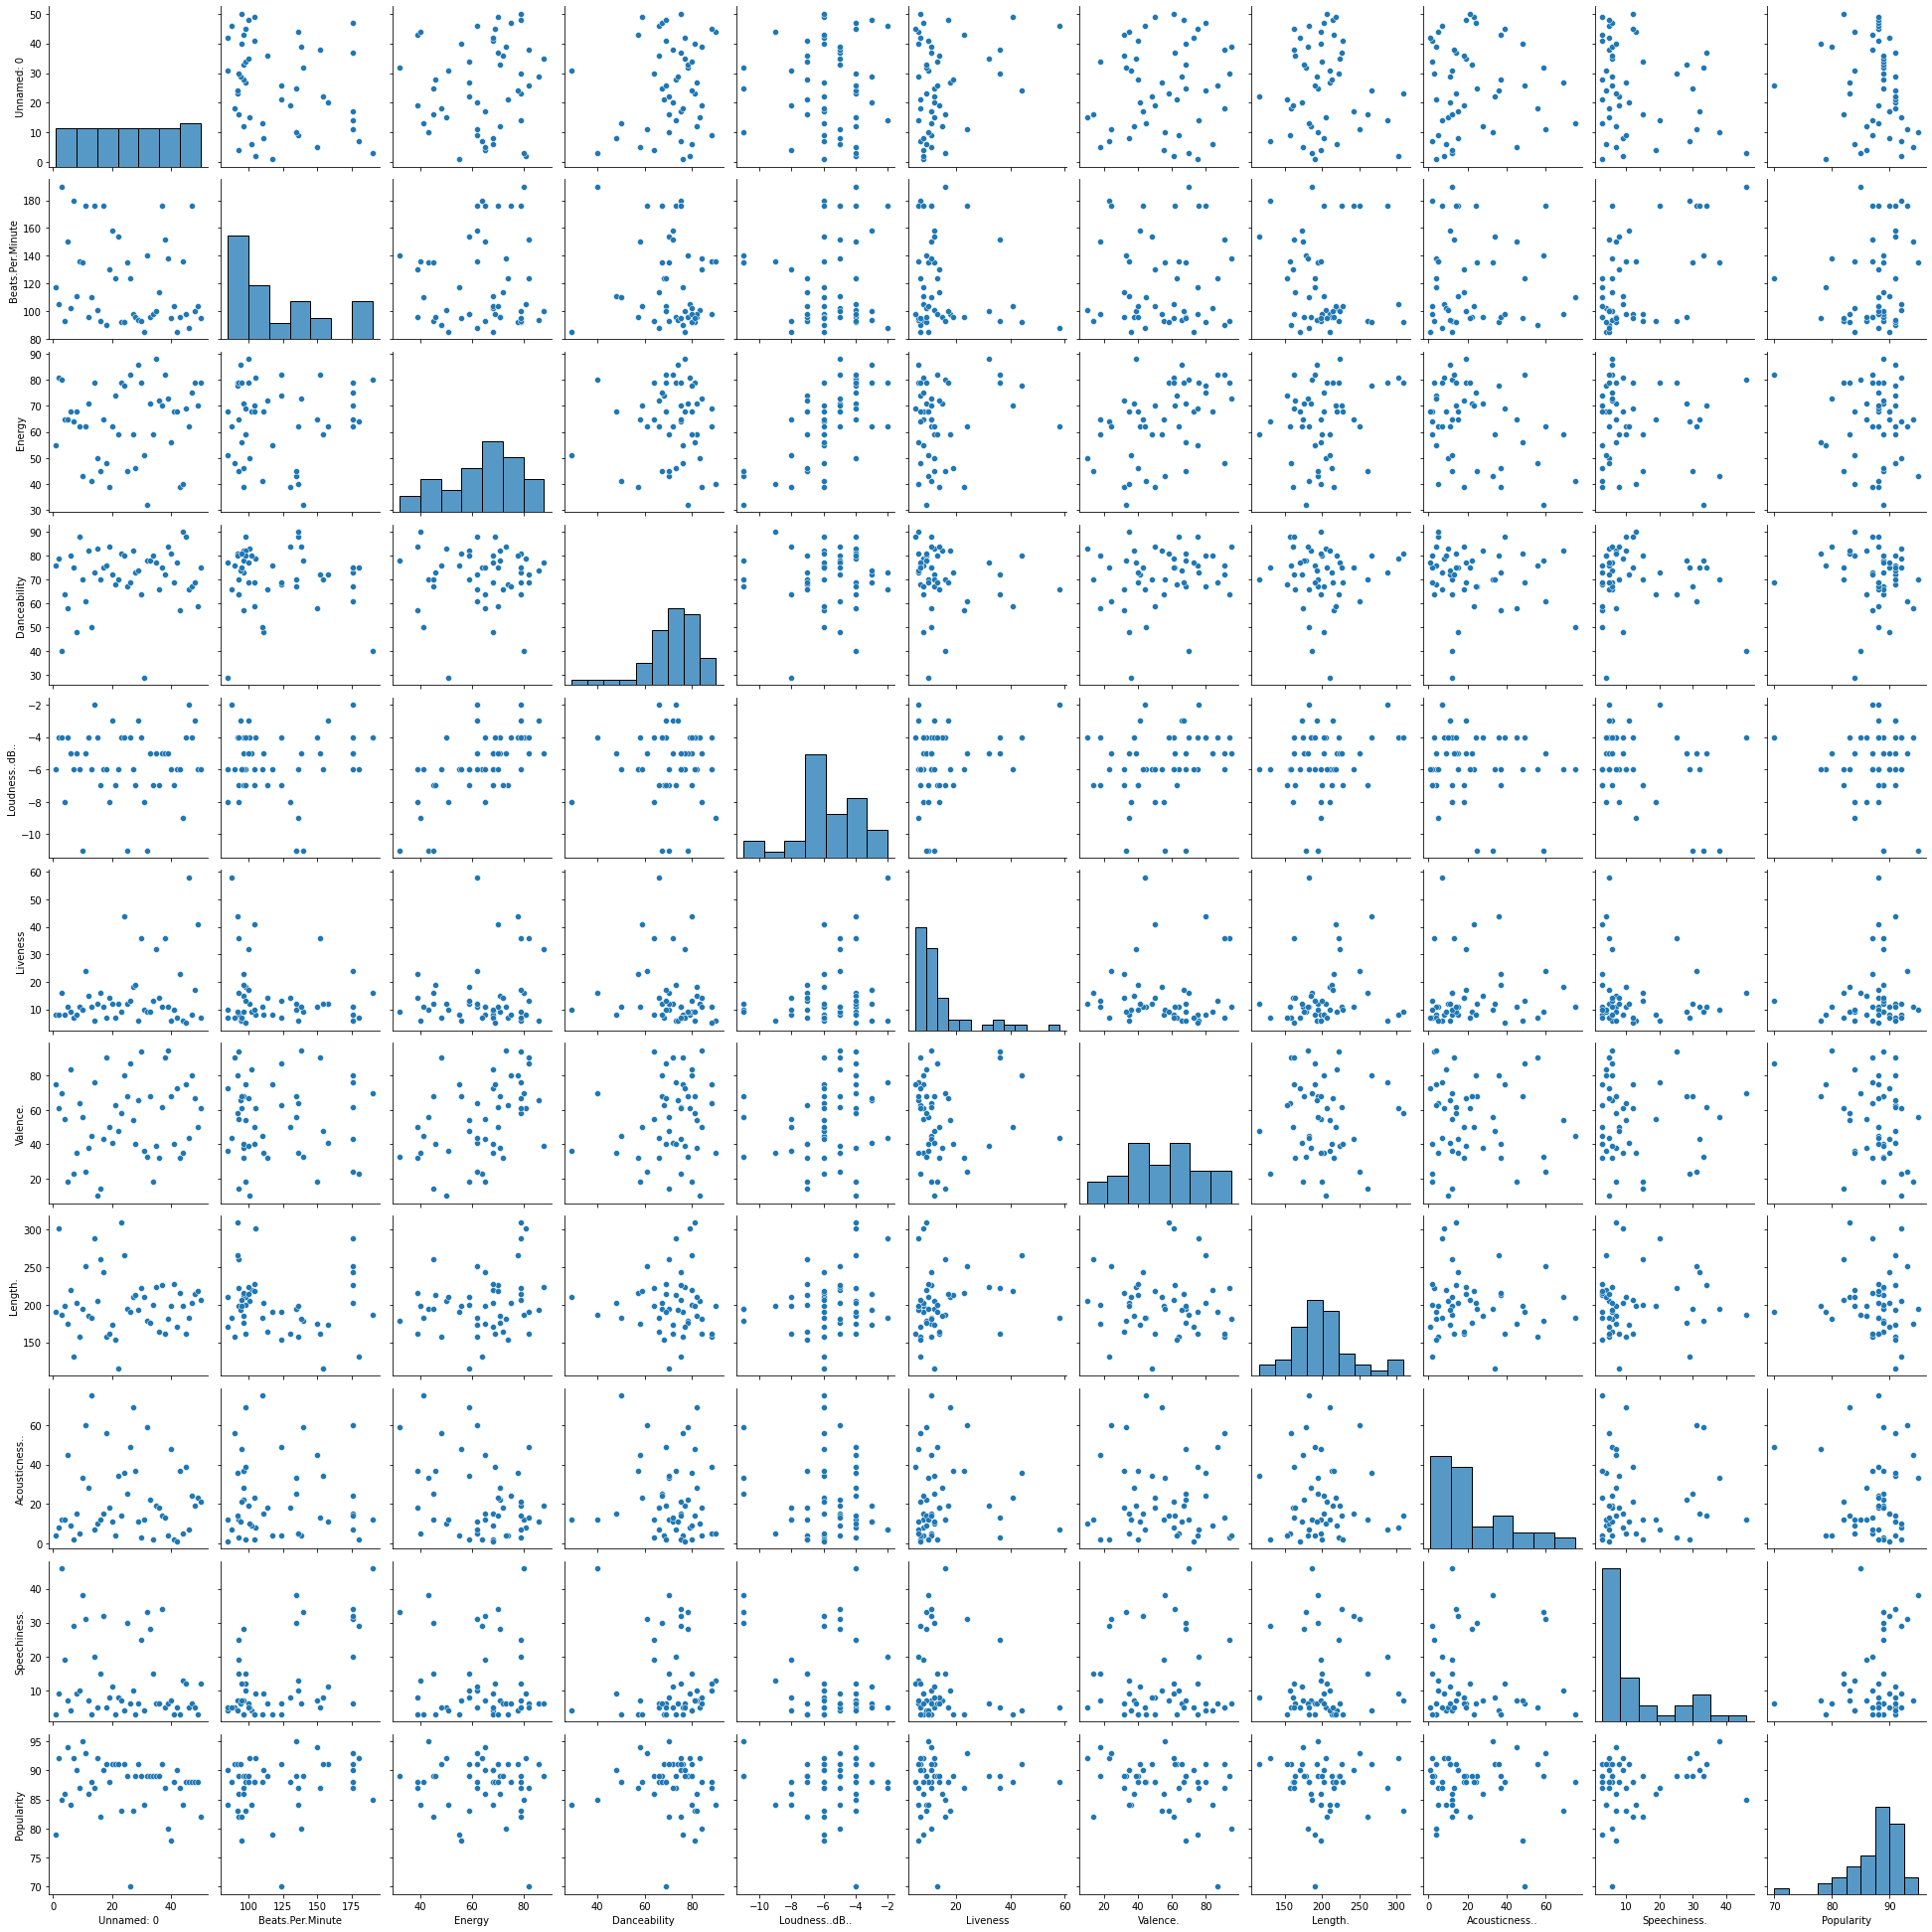

In [13]:
sns.pairplot(song_data) # plots all the data in the data fied in tha dataset 

**Need to convert the Genre data to the numerical format**

In [14]:
#The Artistname and Genre have the String values so we need to convert them to numerical value 
def encode(data): 
  label_encode = LabelEncoder()
  #label_genre = label_encode.fit_transform()
  label = label_encode.fit_transform(data)
  return label


**Appending the numerical data to the dataset**

In [15]:
#song_data.drop("Genre", axis=1, inplace=True) song_data['Genre'] 'Artist.Name']
 
# Appending the array to our dataFrame
# with column name 'Purchased'
song_data["Genre"] = encode(song_data["Genre"])
song_data["Artist.Name"] =encode(song_data["Artist.Name"])
 
# printing Dataframe
song_data.head(5)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Seï¿½orita,32,6,117,55,76,-6,8,75,191,4,3,79
1,2,China,1,19,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),2,8,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),9,15,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),28,9,150,65,58,-4,11,18,175,45,7,94


**Selecting Features on Which the Popularity Depends**

In [16]:
selected_features = song_data[['Genre','Beats.Per.Minute','Artist.Name',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.',]] #feaures on which our reommedtation is dependent
songs_popularity = song_data['Popularity'] #The output that the user get input from our dataset

In [17]:
selected_features.head(5)


,Genre,Beats.Per.Minute,Artist.Name,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.
0,6,117,32,55,76,-6,8,75,191,4,3
1,19,105,1,81,79,-4,8,61,302,8,9
2,8,190,2,80,40,-4,16,70,186,12,46
3,15,93,9,65,64,-8,8,55,198,12,19
4,9,150,28,65,58,-4,11,18,175,45,7


In [18]:
songs_popularity.head(5)

0    79
1    92
2    85
3    86
4    94
Name: Popularity, dtype: int64

**Fill zeros in to Empty cell**

In [19]:
#replacing the null field with 0
for feature in selected_features:
 song_data[feature] = song_data[feature].fillna(0)

##Spliting data in to Training and Testing

In [20]:
#Splitting into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(selected_features,songs_popularity,test_size = 0.2,random_state =500)
#x_train get some random data to train the model as per sixe of test_size, greater the test size less will be train data 
#y_train get the same number of crosspondingnoutput values of x_train
print(x_train.shape)
print(y_train.shape)
#X-test-get the test data from the dataset , size of the test data is specified by the programmer  
#y_test get the same number of crosspondingnoutput values of y_test
print(x_test.shape)
print(y_test.shape)
#Random-state specifies the Randomness in the data set and the repetation of the data set for validation

(40, 11)
(40,)
(10, 11)
(10,)


##Random forest Regressor Algorithm

In [21]:
# Initialzing empty lists to append all model's name and corresponding name
data = []  # initialize a array to store the trained data 
Random_Forest = RandomForestRegressor() #creating the instances of RandomForest Regressor
Random_Forest.fit(x_train.values,y_train.values)# it will train the model. Which can be used in predict() with a single arguement

RandomForestRegressor()

In [22]:
y_predict = Random_Forest.predict(x_test.values)
#y_predict = Random_Forest.predict(x_test)

In [23]:
y_predict

array([89.02, 90.51, 87.38, 87.12, 87.83, 86.17, 88.79, 88.69, 86.57,
       86.97])

**Checking Mean Squared Error for Random Forest Regressor**

In [27]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, y_predict)

15.780310000000014

In [28]:
np.sqrt(mean_squared_error(y_test, y_predict))

3.972443832202038

##Linear Regression Algorithm

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)


0.33778728690263937

In [32]:
Reg_predict =reg.predict(x_test)
Reg_predict

array([89.53598092, 87.82482409, 93.20716767, 87.89386002, 92.52390409,
       88.81684335, 87.17769458, 87.03519111, 87.49572521, 85.83107876])

**Checking Mean Squared Error for Linear Regression**

In [33]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, Reg_predict)

22.395540380086537

In [34]:
np.sqrt(mean_squared_error(y_test, Reg_predict))

4.7323926696848115

##Decision Tree Algorithm

In [36]:
from sklearn.tree import DecisionTreeRegressor 
Decision_tree = DecisionTreeRegressor(random_state = 0)
Decision_tree.fit(x_train.values,y_train.values)

DecisionTreeRegressor(random_state=0)

In [37]:
dec_predict =Decision_tree.predict(x_test)
dec_predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([90., 88., 90., 82., 86., 90., 90., 90., 90., 87.])

In [39]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, dec_predict)

13.5

In [40]:
np.sqrt(mean_squared_error(y_test, Reg_predict))

4.7323926696848115

##User Input


**Input from the user to predict Popularity using Random Forest**

In [ ]:
Artist = str(input("Enter the Artist.Name: "))
genre = str(input("Enter the Genre: "))
arr=[Artist,genre] #need to convert strings to numerical value 
A = encode(arr)
Beats = int(input("Enter the Beats.Per.Minute: "))
Energy = int(input("Enter the Energy: "))
Danceability = int(input("Enter the Danceability"))
Loudness = int(input("Enter the Loudness; "))
Liveness = int(input("Enter the Liveness: "))
Valence = int(input("Enter the Valence: "))
Length = int(input("Enter the Length: "))
Acousticness = int(input("Enter the Acousticness: "))
Speechiness = int(input("Enter the Speechiness: "))
data = np.array([[A[0],A[1],Beats,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness]])
song_popularity =Random_Forest.predict(data)
print(song_popularity)
#Ed Sheeran	pop	102	68	80	-5	9	84	220	9	4	84

**Input from the user to predict Popularity using Linear Regression**

In [ ]:

Artist = str(input("Enter the Artist.Name: "))
genre = str(input("Enter the Genre: "))
arr=[Artist,genre] #need to convert strings to numerical value 
A = encode(arr)
Beats = int(input("Enter the Beats.Per.Minute: "))
Energy = int(input("Enter the Energy: "))
Danceability = int(input("Enter the Danceability"))
Loudness = int(input("Enter the Loudness; "))
Liveness = int(input("Enter the Liveness: "))
Valence = int(input("Enter the Valence: "))
Length = int(input("Enter the Length: "))
Acousticness = int(input("Enter the Acousticness: "))
Speechiness = int(input("Enter the Speechiness: "))
data = np.array([[A[0],A[1],Beats,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness]])
song_popularity =reg.predict(data)
print(song_popularity)
#Ed Sheeran	pop	102	68	80	-5	9	84	220	9	4	84



